In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

from time import time, sleep #Для замера времени выполнения обучения
from tqdm import tqdm #Для вывода прогресса обучения
from tqdm import tqdm_notebook #Для вывода прогресса обучения. Только для python notebook

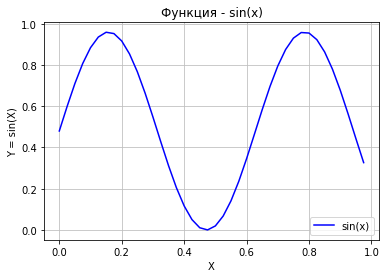

In [2]:
                                        #СОЗДАЕМ ИСХОДНЫЕ ДАННЫЕ
# Зададим имена графику и числовым координатам
plt.title("Функция - sin(x)")
plt.xlabel("X")
plt.ylabel("Y = sin(X)")

X_sin = []
Y_sin = []
x = 0 
while x < 1:
    Y_sin += [ (0.48*(math.sin(x*10))+0.48) ] # Создание целевых данных
    X_sin += [x] # Создание входных данных
    fx = open ('dataset/Data_sin_x.csv', 'w') # Создаем или открываем для записи. w записываем в фаел
    fy = open ('dataset/Data_sin_y.csv', 'w') # Создаем или открываем для записи. w записываем в фаел
    fx.write (str(X_sin)) # Читаем входные данные в массив 
    fy.write (str(Y_sin)) # Читаем целевые данные в массив     
    x += 0.025 # Шаг данных
    
    fx.close()
    fy.close()
#Создаем массивы данных для вывода
X_sin2 = np.zeros(len(X_sin))
Y_sin2 = np.zeros(len(Y_sin))
X_sin2 = np.asfarray(X_sin)
Y_sin2 = np.asfarray(Y_sin)

#Вывод исходной синусоиды
plt.plot(X_sin, Y_sin, color = 'blue', linestyle = 'solid',
         label = 'sin(x)')
# локация имени функции
plt.legend(loc=4) #loc - локация имени, 4 - справа внизу
# Сетка на фоне для улучшения восприятия
plt.grid(True, linestyle='-', color='0.75')
# Показать график 
plt.show()

In [3]:
                                # ЗАГРУЖАЕМ ДАННЫЕ И ЗАПИСЫВАЕМ В МАССИВЫ
# Загрузить и подготовить тренировочные данные из формата CSV в список
training_data = open("dataset/Data_sin_x.csv", 'r') # 'r' - открываем файл для чтения
training_data_list = training_data.readlines() # readlines() - читает все строки в файле в переменную training_data_list
training_data.close() # закрываем файл csv

# Загрузить и подготовить целевые данные из формата CSV в список
target_data = open("dataset/Data_sin_y.csv", 'r') # 'r' - открываем файл для чтения
target_data_list = target_data.readlines() # readlines() - читает все строки в файле в переменную training_data_list
target_data.close() # закрываем файл csv


for i in training_data_list:
        # Получить входные данные числа
        all_values = i.split(',') # Разбиваем на символы
        ty = len(all_values)-2 # Переменная размера данных. -2 чтоб избежать оштбок
        inputs_ = np.asfarray(all_values[1:ty]) # Массив входных данных 
        
for i in target_data_list:
        # Получить целевые данные числа
        all_values_t = i.split(',') # Разбиваем на символы
        targets_ = np.asfarray(all_values_t[1:ty]) # Массив целевых данных

37
37


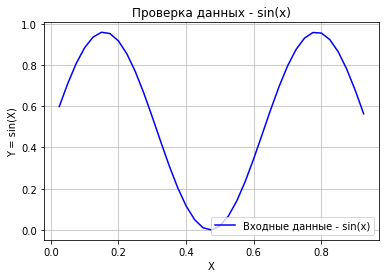

In [4]:
                                # ПРОВЕРЯЕМ ВХОДНЫЕ ДАННЫЕ
# Значения по X входных данных
x_data = inputs_
print(len(x_data)) # Размер входных данных
# Значения по Y входных данных
y_data = targets_
print(len(y_data)) # Размер целевых данных

# Зададим имена графику и числовым координатам
plt.title("Проверка данных - sin(x)")
plt.xlabel("X")
plt.ylabel("Y = sin(X)")

# Начальная прямая
plt.plot(x_data, y_data, 'b', label = 'Входные данные - sin(x)')
plt.legend(loc=4) #loc - локация имени, 4 - справа внизу
 
# Сетка на фоне для улучшения восприятия
plt.grid(True, linestyle='-', color='0.75')
# Показать график 
plt.show()

In [37]:
# Определение класса нейронной сети
class neuron_Net:
    
    # Инициализация весов нейронной сети
    def __init__(self, input_num, neuron_num, output_num, learningrate): #констр.(кол-во входов, кол-во нейронов)
                                         # МАТРИЦА ВЕСОВ
        # Задаем матрицу весов как случайное от -0,5 до 0,5
        self.weights = np.random.normal(+0.0, pow(input_num, +0.1), (neuron_num, input_num))
        self.weights_out = np.random.normal(+0.0, pow(neuron_num, +0.1), (output_num, neuron_num))
                
        # Задаем параметр скорости обучения
        self.lr = learningrate
        
        pass
    
    # Метод обучения нейронной сети
    def train(self, inputs_list, targets_list): # принимает (вх. список данных, ответы)
        # Преобразовать список входов в вертикальный массив. .T - транспонирование
        inputs_x = np.array(inputs_list, ndmin=2).T # матрица числа
        targets_Y = np.array(targets_list, ndmin=2).T # матрица ответов: какое это число
        
                                           # ВЫЧИСЛЕНИЕ СИГНАЛОВ
        # Вычислить сигналы в нейронах скрытого слоя. Взвешенная сумма.
        x1 = np.dot(self.weights, inputs_x)# dot - умножение матриц X = W*I = weights * inputs
        # Вычислить сигналы, выходящие из нейрона
        #y1 = 1/(1+np.exp(-x1)) #Сигмоида
        y1 = np.maximum(x1, 0) #RELU
        #y1 = (np.exp(2*x1)-1)/(np.exp(2*x1)+1) #Тангенс
        # Вычислить сигналы в нейронах выходного слоя. Взвешенная сумма.
        x2 = np.dot(self.weights_out, y1) 
        
                                            # ВЫЧИСЛЕНИЕ ОШИБКИ
        #  Ошибка E = -(цель - фактическое значение) 
        E = -(targets_Y - x2)
        # Скрытая ошибка слоя-это output_errors, разделенные на весы, рекомбинированные на скрытых узлах
        E_hidden = np.dot(self.weights_out.T, E)
        
                                            # ОБНОВЛЕНИЕ ВЕСОВ
        # Меняем веса по каждой связи
        self.weights_out -= self.lr * np.dot((E * x2), np.transpose(y1))
        # Меняем веса по каждой связи
        #self.weights -= self.lr * np.dot((E_hidden * y1 * (1.0 - y1)), np.transpose(inputs_x)) #Сигмоида
        self.weights -= self.lr * np.dot((E_hidden * (y1 > 0)), np.transpose(inputs_x)) #RELU
        #self.weights -= self.lr * np.dot((E_hidden * (1.0 - np.power(y1, 2))), np.transpose(inputs_x)) #Тангенс
        
         
        pass
    
    # Метод прогона тестовых значений
    def query(self, inputs_list): # Принимает свой набор тестовых данных
        # Преобразовать список входов в вертикальный 2D массив. 
        inputs_x = np.array(inputs_list, ndmin=2).T 
        
        #Вычислить сигналы в нейронах скрытого слоя. Взвешенная сумма.
        x1 = np.dot(self.weights, inputs_x)# dot - умножение матриц X = W*I = weights * inputs
        # Вычислить сигналы, выходящие из нейрона
        #y1 = 1/(1+np.exp(-x1)) #Сигмоида
        y1 = np.maximum(x1, 0) #RELU
        #y1 = (np.exp(2*x1)-1)/(np.exp(2*x1)+1) #Тангенс
        # Вычислить сигналы в нейронах выходного слоя. Взвешенная сумма.
        x2 = np.dot(self.weights_out, y1) 
        
        return x2
    
    # Метод возвращает сигнал с определенного нейрона скрытого слоя
    def querynum(self, inputs_list, numnet): 
        # Преобразовать список входов в вертикальный 2D массив. 
        inputs_x = np.array(inputs_list, ndmin=2).T 
        
        #Вычислить сигналы в нейронах скрытого слоя. Взвешенная сумма.
        x1 = np.dot(self.weights, inputs_x)# dot - умножение матриц X = W*I = weights * inputs
        # Вычислить сигналы, выходящие из нейрона. Функция активации - сигмоида(x)
        #y1 = 1/(1+np.exp(-x1)) #Сигмоида
        y1 = np.maximum(x1, 0) #RELU
        #y1 = (np.exp(2*x1)-1)/(np.exp(2*x1)+1) #Тангенс
        
        return y1[numnet]
    
    # Метод возвращает сигнал - wouti * tanh(wi * x + bi) 
    def querynum2(self, inputs_list, numnet): # Принимает входные данные и номер комбинации
        # Преобразовать список входов в вертикальный 2D массив. 
        inputs_x = np.array(inputs_list, ndmin=2).T 
        
        #Вычислить сигналы в нейронах скрытого слоя. Взвешенная сумма.
        x1 = np.dot(self.weights, inputs_x)
        # Вычислить сигналы, выходящие из нейрона
        #y1 = 1/(1+np.exp(-x1)) #Сигмоида
        y1 = np.maximum(x1, 0) #RELU
        #y1 = (np.exp(2*x1)-1)/(np.exp(2*x1)+1) #Тангенс
        y12 = np.dot(self.weights_out[0,numnet], y1[numnet])         
        
        return y12

In [38]:
                            # ЗАДАЁМ ПАРАМЕТРЫ СЕТИ
# Количество входных данных, нейронов
data_input = 2
data_neuron = 70
data_output = 1

# Cкорость обучения
learningrate = 0.01

# Создать экземпляр нейронной сети
n = neuron_Net(data_input, data_neuron, data_output, learningrate)

In [39]:
                            # ОБУЧЕНИЕ
# Зададим количество эпох
epochs = 60000
start = time()
# Прогон по обучающей выборке
#for e in range(epochs):
for e in tqdm(range(epochs)):
    for i in range(len(x_data)):
        
        # Получить входные данные числа
        inputs_x = x_data[i]
        # Добавляем второй вход bias = 1
        inputs_x = np.append(inputs_x, 1)
        targets_Y = y_data[i]   # перевод символов в int, 0 элемент - ответ
        #round(x, 1) #Округление числа
            
        n.train(inputs_x, targets_Y) # наш метод train - обучение нейронной сети
        
time_out = time() - start
print("Время выполнения: ", time_out, " сек" )

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:00<00:00, 997.33it/s]


Время выполнения:  60.163711071014404  сек


In [40]:
# Вывод обученных весов
print('Весовые коэффициенты:\n', n.weights)
print('Весовые коэффициенты от скрытого слоя:\n', n.weights_out)

Весовые коэффициенты:
 [[ -4.47837071e-01  -1.02285796e+00]
 [ -2.36104657e-01  -1.70185315e+00]
 [  1.05912690e+00  -9.83411733e-01]
 [ -8.57650938e-01  -2.67873932e+00]
 [ -2.23545758e-01  -3.78894583e-02]
 [  6.31306924e-01  -5.05066823e-01]
 [ -5.82527198e-01  -1.75446355e+00]
 [ -3.15052867e-01  -3.19501645e-01]
 [ -1.33269662e+00  -1.18077075e+00]
 [  1.99537678e+00  -2.29801671e+00]
 [ -1.69682516e-01  -1.59982526e-01]
 [ -9.14443260e-01  -5.79080074e-02]
 [  1.08749484e+00  -1.22524261e+00]
 [  4.96668927e-01   9.66170319e-02]
 [  2.52845100e+00  -2.79401169e-01]
 [  1.10277220e+00  -1.02022693e+00]
 [  1.68344282e+00  -5.84045346e+00]
 [  4.95083562e-01  -6.23704053e-01]
 [ -7.59301048e-01  -2.99187646e-02]
 [  8.16552407e-01  -3.09513313e+00]
 [ -9.04847919e-01  -1.84970212e+00]
 [ -1.63711670e+00  -4.91304376e-01]
 [ -1.78357572e-01  -5.07800832e-01]
 [  1.94584290e+00  -9.98107617e-01]
 [ -8.69097937e-01  -4.47481074e+00]
 [  1.70776663e-01  -1.72972078e-01]
 [ -1.37816880e

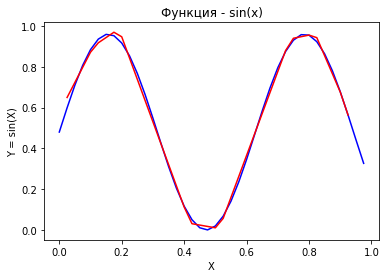

In [41]:
# Создание значений на выходе сети
outputs_ = np.array([])
for i in range(len(x_data)):
    inputs_x = x_data[i]
    inputs_x = np.append(inputs_x, 1) # Еще раз создаем массив входных данных
    # Прогон по сети
    outputs_ = np.append(outputs_, n.query(inputs_x)) # Еще раз создаем массив выходных данных обученной сети
    #outputs = n.query(inputs_x)

# Создание значений на выходе нейрона срытого слоя    
outputs_num0 = np.array([])
outputs_num1 = np.array([])
outputs_num2 = np.array([])
outputs_num3 = np.array([])
outputs_num4 = np.array([])
outputs_num5 = np.array([])
outputs_num6 = np.array([])
for i in range(len(x_data)):
    # Получить входные данные числа
    inputs_num = x_data[i]
    inputs_num = np.append(inputs_num, 1)
    outputs_num0 = np.append(outputs_num0, n.querynum2(inputs_num, 0))
    outputs_num1 = np.append(outputs_num1, n.querynum2(inputs_num, 1))
    outputs_num2 = np.append(outputs_num2, n.querynum2(inputs_num, 2))
    outputs_num3 = np.append(outputs_num3, n.querynum2(inputs_num, 3))
    outputs_num4 = np.append(outputs_num4, n.querynum2(inputs_num, 4))
    outputs_num5 = np.append(outputs_num5, n.querynum2(inputs_num, 5))
    outputs_num6 = np.append(outputs_num6, n.querynum2(inputs_num, 6))

# Еще раз выводем синусоиду
X_sin = []
Y_sin = []
x = 0.0 
while x < 1:
    Y_sin += [ (0.48*(math.sin(x*10))+0.48) ]
    X_sin += [x]
    x += 0.025

X_sin2 = np.zeros(len(X_sin))
Y_sin2 = np.zeros(len(Y_sin))
X_sin2 = np.asfarray(X_sin)
Y_sin2 = np.asfarray(Y_sin)

plt.plot(X_sin, Y_sin, color = 'b', linestyle = 'solid',
         label = 'Входные данные - sin(x)')

# Зададим имена графику и числовым координатам
plt.title("Функция - sin(x)")
plt.xlabel("X")
plt.ylabel("Y = sin(X)")

# Обученная сеть
plt.plot(x_data, outputs_, color = 'red', label = 'Обученная сеть - sin(x)')

NameError: name 'outputs_num7' is not defined

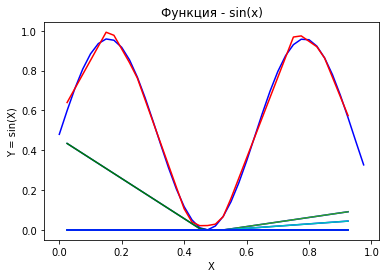

In [36]:
# Выводим целевую синусоиду
X_sin = []
Y_sin = []
x = 0.0 
while x < 1:
    Y_sin += [ (0.48*(math.sin(x*10))+0.48) ]
    X_sin += [x]
    x += 0.025

X_sin2 = np.zeros(len(X_sin))
Y_sin2 = np.zeros(len(Y_sin))
X_sin2 = np.asfarray(X_sin)
Y_sin2 = np.asfarray(Y_sin)

plt.plot(X_sin, Y_sin, color = 'b', linestyle = 'solid',
         label = 'Входные данные - sin(x)')
# Зададим имена графику и числовым координатам
plt.title("Функция - sin(x)")
plt.xlabel("X")
plt.ylabel("Y = sin(X)")

# Обученная сеть
plt.plot(x_data, outputs_, color = 'red', label = 'Обученная сеть - sin(x)')

# Выход сети по отдельным связям - wouti * tanh(wi * x + bi)
plt.plot(x_data, outputs_num0, color = 'b', linestyle = 'solid')
plt.plot(x_data,outputs_num0, label='wout1 * tanh(w1 * x + b1)') # label=имя функции

plt.plot(x_data, outputs_num1, color = 'b', linestyle = 'solid')
plt.plot(x_data,outputs_num1, label='wout2 * tanh(w2 * x + b2)')

plt.plot(x_data, outputs_num2, color = 'b', linestyle = 'solid')
plt.plot(x_data,outputs_num2, label='wout3 * tanh(w3 * x + b3)')

plt.plot(x_data, outputs_num3, color = 'b', linestyle = 'solid')
plt.plot(x_data,outputs_num3, color = 'g',label='wout4 * tanh(w4 * x + b4)')

plt.plot(x_data, outputs_num4, color = 'b', linestyle = 'solid')
plt.plot(x_data,outputs_num4, color = 'c', label='wout5 * tanh(w5 * x + b5)')

plt.plot(x_data, outputs_num5, color = 'b', linestyle = 'solid')
plt.plot(x_data,outputs_num5, color = 'c', label='wout6 * tanh(w6 * x + b6)')

plt.plot(x_data, outputs_num6, color = 'b', linestyle = 'solid')
plt.plot(x_data,outputs_num7, color = 'c', label='wout7 * tanh(w7 * x + b7)')
plt.legend(loc=4) #loc - локация имени, 4 - справа внизу

# Сетка на фоне для улучшения восприятия
plt.grid(True, linestyle='-', color='0.75')
# Показать график 
plt.show()